In [1]:
import unicodecsv

prices = []
f = open('train.csv', 'rb')
with open('train.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    prices = list(reader)


In [2]:


for price in prices:
    price['UNDER_CONSTRUCTION'] = bool(int(price['UNDER_CONSTRUCTION']))
    price['RERA'] = bool(int(price['RERA']))
    price['BHK_NO.'] = int(price['BHK_NO.'])
    price['SQUARE_M'] = float(price['SQUARE_M'])
    price['READY_TO_MOVE'] = bool(int(price['READY_TO_MOVE']))
    price['RESALE'] = bool(int(price['RESALE']))
    price['LONGITUDE'] = float(price['LONGITUDE'])
    price['LATITUDE'] = float(price['LATITUDE'])
    price['TARGET(PRICE_IN_BGP)'] = price['TARGET(PRICE_IN_BGP)\t']
    del price['TARGET(PRICE_IN_BGP)\t']
    price['TARGET(PRICE_IN_BGP)'] = float(price['TARGET(PRICE_IN_BGP)'].split("\t", 1)[0])


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
pricesDataset = pd.DataFrame(prices)

In [5]:
pricesDataset.head(4)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_M,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_BGP)
0,Builder,False,False,1,39.219331,True,False,"Hoshangabad Road,Bhopal",22.750000,77.720000,11480.935328
1,Builder,False,False,1,40.916871,True,False,"Anakaputhur,Chennai",12.982800,80.126400,21803.244154
2,Builder,False,False,1,41.207873,True,False,"Virar,Mumbai",42.049481,-87.681841,39814.619760
3,Builder,False,False,1,52.755728,True,False,"Pen,Raigad",18.750000,73.080000,27280.387613


[0, 1]


Text(0.5, 1.0, 'Houses ready to move in')

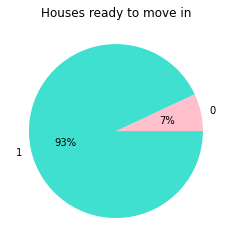

In [6]:
data = pricesDataset['RESALE']
(unique, counts) = np.unique(data, return_counts=True)
frequencies = dict(np.asarray((unique, counts)).T)  
#print(frequencies.values())
x = list(frequencies)
y = list(frequencies.values())
print(x)
#b = np.arange(pricesDataset['L'].min(), pricesDataset['SQUARE_M'].max())
#print(data.describe())
#print(np.median(data))
plt.pie(y, labels=x, colors=['pink', 'turquoise'], autopct='%1.0f%%')
#plt.xticks(x, ('New buy', 'resale'))
plt.title("Houses ready to move in")
#plt.xlabel("Posted by")
#plt.ylabel("Frequency")
#plt.show()


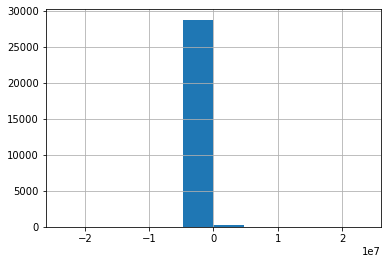

In [7]:
plt.figure();
pricesDataset['SQUARE_M'].diff().hist()

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats

In [9]:
from numpy import percentile
data = pricesDataset
#plt.boxplot(data)
#plt.title('Finding outliers')
#plt.xlabel('TARGET(PRICE_IN_BGP)')
#plt.ylabel('Price in pound sterling')

#plt.show()
#quantiles = data.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
#print(quantiles)
#q1, q3 = percentile(data, 25), percentile(data, 75)
#iqr = q3 - q1
#margin = iqr * 1.5
#lower, upper = q1 - margin, q3 + margin
#outliers = [x for x in data if x < lower or x > upper]
#print(len(outliers))
from scipy.stats import kstest, norm
my_data = norm.rvs(data["LONGITUDE"])
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)


0.99958682903168 0.0


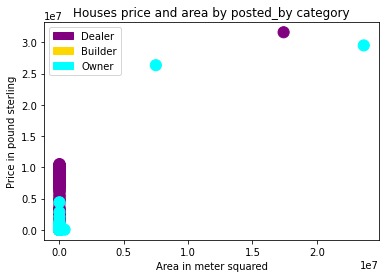

In [10]:
colormap = np.array(['aqua', 'purple', 'gold'])
rsls = []
for rsl in pricesDataset['POSTED_BY']:
    if rsl == 'Dealer':
        rsls.append(1)
    elif rsl == 'Builder':
        rsls.append(2)
    elif rsl == 'Owner':
        rsls.append(0)
category = np.array(rsls)
plt.scatter(pricesDataset['SQUARE_M'], pricesDataset['TARGET(PRICE_IN_BGP)'], color=colormap[category],s=124 )
pop_a = mpatches.Patch(color='purple', label='Dealer')
pop_b = mpatches.Patch(color='gold', label='Builder')
pop_c = mpatches.Patch(color='aqua', label='Owner')
plt.legend(handles=[pop_a,pop_b,pop_c])
plt.ylabel("Price in pound sterling")
plt.xlabel("Area in meter squared")
plt.title("Houses price and area by posted_by category")
plt.show()


In [11]:
corr = data.corr()

                      UNDER_CONSTRUCTION      RERA   BHK_NO.  SQUARE_M  \
UNDER_CONSTRUCTION              1.000000  0.364299 -0.042503 -0.004233   
RERA                            0.364299  1.000000  0.008403 -0.006251   
BHK_NO.                        -0.042503  0.008403  1.000000  0.005337   
SQUARE_M                       -0.004233 -0.006251  0.005337  1.000000   
READY_TO_MOVE                  -1.000000 -0.364299  0.042503  0.004233   
RESALE                         -0.346085 -0.270268  0.013146  0.001768   
LONGITUDE                       0.006420  0.103617  0.067711 -0.012646   
LATITUDE                       -0.000850 -0.065424  0.046988  0.000813   
TARGET(PRICE_IN_BGP)            0.054618  0.067314  0.113654  0.409571   

                      READY_TO_MOVE    RESALE  LONGITUDE  LATITUDE  \
UNDER_CONSTRUCTION        -1.000000 -0.346085   0.006420 -0.000850   
RERA                      -0.364299 -0.270268   0.103617 -0.065424   
BHK_NO.                    0.042503  0.013146   0

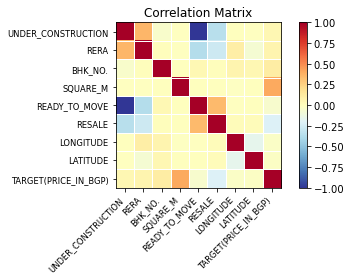

In [12]:
from statsmodels import api
corr = data.corr()
print(corr)
api.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [14]:
q1, q3 = percentile(data['TARGET(PRICE_IN_BGP)'], 25), percentile(data['TARGET(PRICE_IN_BGP)'], 75)
iqr = q3 - q1
margin = iqr * 1.5
lower, upper = q1 - margin, q3 + margin
OutdfB, OutdfD, OutdfO = [], [], []
for price in prices:
    if price['TARGET(PRICE_IN_BGP)'] < upper and price['TARGET(PRICE_IN_BGP)'] > lower:
        und, rer, rea, res = 0, 0, 0, 0  
        if price['UNDER_CONSTRUCTION'] == True:
            und = 1
        elif price['UNDER_CONSTRUCTION'] == False:
            und = 0
        if price['RERA'] == True:
            rer = 1
        elif price['RERA'] == False:
            rer = 0
        if price['READY_TO_MOVE'] == True:
            rea = 1
        elif price['READY_TO_MOVE'] == False:
            rea = 0
        if price['RESALE'] == True:
            res = 1
        elif price['RESALE'] == False:
            res = 0
        case = {'UNDER_CONSTRUCTION': und, 'RERA': rer, 'BHK_NO.': price['BHK_NO.'], 'SQUARE_M': price['SQUARE_M'], 'READY_TO_MOVE': rea, 'RESALE': res, 'LONGITUDE': price['LONGITUDE'], 'LATITUDE': price['LATITUDE'], 'TARGET(PRICE_IN_BGP)': price['TARGET(PRICE_IN_BGP)']}
        if price['POSTED_BY'] == 'Dealer':
            OutdfD.append(case)
        elif price['POSTED_BY'] == 'Builder':
            OutdfB.append(case)
        elif price['POSTED_BY'] == 'Owner':
            OutdfO.append(case)

In [15]:
dfO, dfD, dfB  = pd.DataFrame(OutdfO), pd.DataFrame(OutdfD), pd.DataFrame(OutdfB)
dfO.head(5)
#print(len(dfD))

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_M,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_BGP)
0,0,0,1,0.929030,1,1,21.216630,72.899374,8426.374552
1,0,0,1,1.020067,1,1,21.047939,75.770559,28755.003160
2,0,0,1,92.903040,1,1,12.968029,74.900647,29492.310933
3,0,0,1,92.903040,1,1,19.048746,72.932337,14746.155467
4,0,0,1,92.903040,1,1,20.968491,72.920920,14219.507057


In [16]:
dfO = dfO.sample(frac = 1) 
dfD = dfD.sample(frac = 1) 
dfB = dfB.sample(frac = 1) 

In [17]:
dfO.to_csv(r'Desktop/dfOwner.csv', index = False)
dfD.to_csv(r'Desktop/dfDealer.csv', index = False)
dfB.to_csv(r'Desktop/dfBuilder.csv', index = False)

In [30]:
X = dfD[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_M', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']]
y = dfD['TARGET(PRICE_IN_BGP)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
print('intercept: %.2f'% regressor.intercept_)

Coefficients: 
 [-1.34980027e+03  7.31831105e+03  2.19362102e+04  8.26752731e+00
  1.34980027e+03 -1.35724794e+03 -1.78489322e+03 -6.87626178e+02]
Mean squared error: 1736797197.79
Coefficient of determination: 0.19
Coefficient of determination: 119770.31


In [32]:
X = dfO[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_M', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']]
y = dfO['TARGET(PRICE_IN_BGP)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
print('intercept: %.2f'% regressor.intercept_)


Coefficients: 
 [-3.31300373e+01  7.96835413e+03  2.37148293e+04 -6.65789331e-02
  3.31300373e+01  1.15095449e+04 -9.11468057e+02 -1.22642010e+02]
Mean squared error: 730620918.29
Coefficient of determination: 0.20
intercept: 15481.42


In [33]:
X = dfB[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_M', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']]
y = dfB['TARGET(PRICE_IN_BGP)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
print('intercept: %.2f'% regressor.intercept_)

Coefficients: 
 [ 1847.8431142   7773.46673221 13419.03854945   169.13910854
 -1847.8431142   4191.14400871  -949.61508333   -59.41409203]
Mean squared error: 646507409.67
Coefficient of determination: 0.36
intercept: 21805.75


In [35]:
q1, q3 = percentile(data['TARGET(PRICE_IN_BGP)'], 25), percentile(data['TARGET(PRICE_IN_BGP)'], 75)
iqr = q3 - q1
margin = iqr * 1.5
lower, upper = q1 - margin, q3 + margin
Outdf = []
for price in prices:
    if price['TARGET(PRICE_IN_BGP)'] < upper and price['TARGET(PRICE_IN_BGP)'] > lower:
        pos, und, rer, rea, res = 0, 0, 0, 0, 0  
        if price['UNDER_CONSTRUCTION'] == True:
            und = 1
        elif price['UNDER_CONSTRUCTION'] == False:
            und = 0
        if price['RERA'] == True:
            rer = 1
        elif price['RERA'] == False:
            rer = 0
        if price['READY_TO_MOVE'] == True:
            rea = 1
        elif price['READY_TO_MOVE'] == False:
            rea = 0
        if price['RESALE'] == True:
            res = 1
        elif price['RESALE'] == False:
            res = 0
        if price['POSTED_BY'] == 'Dealer':
            pos = 0
        elif price['POSTED_BY'] == 'Builder':
            pos = 1
        elif price['POSTED_BY'] == 'Owner':
            pos = 2
        case = {'POSTED_BY': pos, 'UNDER_CONSTRUCTION': und, 'RERA': rer, 'BHK_NO.': price['BHK_NO.'], 'SQUARE_M': price['SQUARE_M'], 'READY_TO_MOVE': rea, 'RESALE': res, 'LONGITUDE': price['LONGITUDE'], 'LATITUDE': price['LATITUDE'], 'TARGET(PRICE_IN_BGP)': price['TARGET(PRICE_IN_BGP)']}
        Outdf.append(case)

In [36]:
df= pd.DataFrame(Outdf)
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_M,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_BGP)
0,1,0,0,1,39.219331,1,0,22.750000,77.720000,11480.935328
1,1,0,0,1,40.916871,1,0,12.982800,80.126400,21803.244154
2,1,0,0,1,41.207873,1,0,42.049481,-87.681841,39814.619760
3,1,0,0,1,52.755728,1,0,18.750000,73.080000,27280.387613
4,1,0,0,1,55.079476,1,0,13.086769,80.191135,49926.269223


In [37]:
df = df.sample(frac = 1) 
df.to_csv(r'Desktop/df.csv', index = False)

In [38]:
X = df[['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_M', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']]
#X = sm.add_constant(X) #add the intercept value y=mx+c
y = df['TARGET(PRICE_IN_BGP)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
print('intercept: %.2f'% regressor.intercept_)

Coefficients: 
 [-1.40422258e+04 -1.27342166e+03  8.33762585e+03  2.22691667e+04
 -6.14989452e-02  1.27342166e+03  6.57412830e+03 -1.38440043e+03
 -3.75001237e+02]
Mean squared error: 1339741395.08
Coefficient of determination: 0.28
intercept: 79182.19
